# Importing libraries

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load .mat files
training_mat = scipy.io.loadmat('Training.mat')
control_mat = scipy.io.loadmat('Control.mat')

# Extract data from .mat files
training1_mat = training_mat['training1']
training2_mat = training_mat['training2']
control1_mat = control_mat['control1']
control2_mat = control_mat['control2']

# Load .npz files
training_npz = np.load('Training.npz')
control_npz = np.load('Control.npz')

# Extract data from .npz files
training1_npz = training_npz['training1']
training2_npz = training_npz['training2']
control1_npz = control_npz['control1']
control2_npz = control_npz['control2']

# Combine data from .mat files
training_combined_mat = np.concatenate((training1_mat, training2_mat), axis=2)
control_combined_mat = np.concatenate((control1_mat, control2_mat), axis=2)
X_mat = np.concatenate((training_combined_mat, control_combined_mat), axis=2)
X_mat = np.reshape(X_mat, (X_mat.shape[2], -1))

# Combine data from .npz files
training_combined_npz = np.concatenate((training1_npz, training2_npz), axis=2)
control_combined_npz = np.concatenate((control1_npz, control2_npz), axis=2)
X_npz = np.concatenate((training_combined_npz, control_combined_npz), axis=2)
X_npz = np.reshape(X_npz, (X_npz.shape[2], -1))

# Concatenate all data
X = np.concatenate((X_mat, X_npz), axis=0)

# Create labels (1 for training, 0 for control)
labels_mat = np.concatenate((np.ones(training_combined_mat.shape[2]), np.zeros(control_combined_mat.shape[2])), axis=0)
labels_npz = np.concatenate((np.ones(training_combined_npz.shape[2]), np.zeros(control_combined_npz.shape[2])), axis=0)

# Concatenate labels
y = np.concatenate((labels_mat, labels_npz), axis=0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test Split

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate a RandomForestClassifier

Random Forest Classifier Accuracy: 0.88
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       151
         1.0       0.86      0.94      0.90       203

    accuracy                           0.88       354
   macro avg       0.89      0.87      0.88       354
weighted avg       0.88      0.88      0.88       354



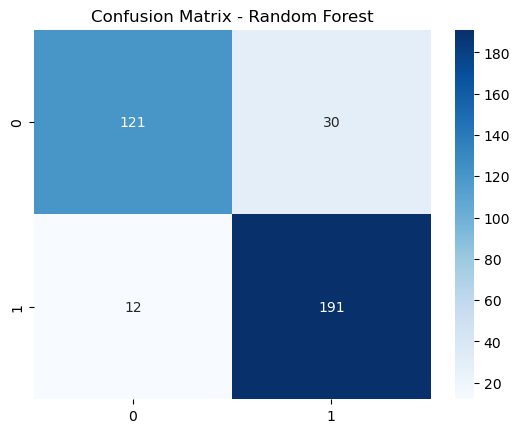

In [4]:
# Train and evaluate a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Tuned Random Forest Classifier

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, 
                               n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the data
rf_random.fit(X_train, y_train)

# Get the best parameters and estimator
best_rf = rf_random.best_estimator_
print("Best parameters for RandomForestClassifier:", rf_random.best_params_)

# Evaluate the tuned RandomForestClassifier
y_pred_rf = best_rf.predict(X_test)
print(f"Tuned Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Tuned Random Forest Classifier Accuracy: 0.92
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       151
         1.0       0.88      0.98      0.93       203

    accuracy                           0.92       354
   macro avg       0.93      0.90      0.91       354
weighted avg       0.92      0.92      0.91       354



# Train and evaluate an SVM

SVM Classifier Accuracy: 0.82
Classification Report for SVM:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.77       151
         1.0       0.81      0.89      0.85       203

    accuracy                           0.82       354
   macro avg       0.82      0.81      0.81       354
weighted avg       0.82      0.82      0.82       354



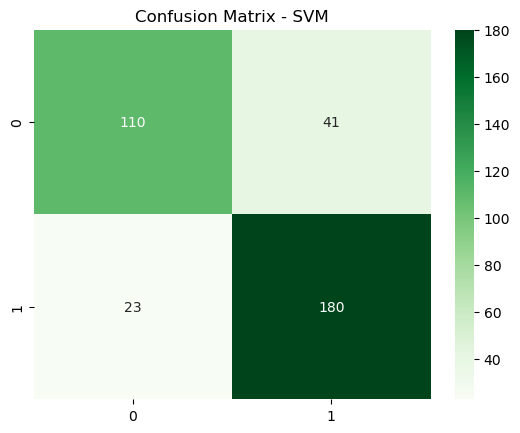

In [6]:
# Train and evaluate an SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm:.2f}")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - SVM")
plt.show()



# Tuned SVM

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Initialize RandomizedSearchCV
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=svm_param_grid, 
                                n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the data
svm_random.fit(X_train, y_train)

# Get the best parameters and estimator
best_svm = svm_random.best_estimator_
print("Best parameters for SVM:", svm_random.best_params_)

# Evaluate the tuned SVM
y_pred_svm = best_svm.predict(X_test)
print(f"Tuned SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 100}
Tuned SVM Classifier Accuracy: 0.91
Classification Report for SVM:
               precision    recall  f1-score   support

         0.0       1.00      0.79      0.88       151
         1.0       0.86      1.00      0.93       203

    accuracy                           0.91       354
   macro avg       0.93      0.89      0.90       354
weighted avg       0.92      0.91      0.91       354



# Train and evaluate a KNeighbors Classifier

KNN Classifier Accuracy: 0.57
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.49      0.23      0.31       151
         1.0       0.59      0.82      0.68       203

    accuracy                           0.57       354
   macro avg       0.54      0.52      0.50       354
weighted avg       0.54      0.57      0.53       354



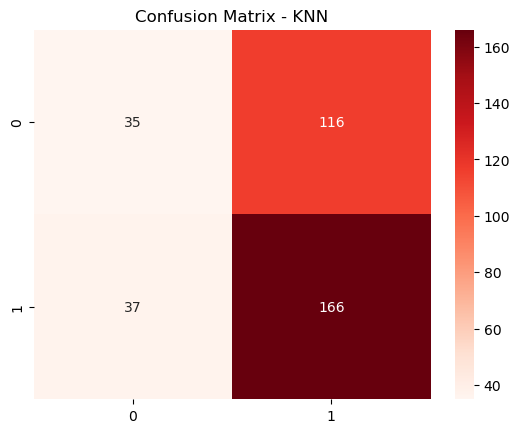

In [8]:
# Train and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the KNeighborsClassifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.2f}")
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - KNN")
plt.show()


# Tuned KNN

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_grid, 
                                n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the data
knn_random.fit(X_train, y_train)

# Get the best parameters and estimator
best_knn = knn_random.best_estimator_
print("Best parameters for KNN:", knn_random.best_params_)

# Evaluate the tuned KNN
y_pred_knn = best_knn.predict(X_test)
print(f"Tuned KNN Classifier Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'minkowski'}
Tuned KNN Classifier Accuracy: 0.89
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86       151
         1.0       0.86      0.96      0.91       203

    accuracy                           0.89       354
   macro avg       0.90      0.87      0.88       354
weighted avg       0.89      0.89      0.89       354

